<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EA%B8%B0%EC%B4%88)_3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5%2B%EA%B3%BC%EC%A0%9C_%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(기초) 3주차 과제 답안

선형회귀 복습 + 경사하강법 실습
: 당뇨병 환자의 데이터를 토대로 선형 회귀를 진행해보고 경사 하강법도 적용해봅시다!



---

##1. 라이브러리

*  **matplotlib**: 시각화 관련 함수들을 모아놓은 모듈(그래프를 그려준다!)

  자세한 정보는 https://matplotlib.org/ 참고

In [1]:
import matplotlib.pyplot as plt

##2. 데이터셋 준비



*   **sklearn.datasets**: 대표적인 sample dataset들을 제공하고 쉽게 다운로드 받을 수 있음.

  ex) 아이리스, 보스턴 집값 데이터, 당뇨병 환자 데이터 등
  
  https://teddylee777.github.io/scikit-learn/Sklearn-dataset-%EB%AA%A8%EB%93%88%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-dataset%EB%A1%9C%EB%94%A9%ED%95%98%EA%B8%B0
*   **load_diabetes**: 당뇨병 환자 데이터셋 준비



In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

## 3. 입력과 타깃 데이터의 크기 확인

data는 442 * 10 크기의 2차원 배열, target은 442개의 요소를 가진 1차원 배열

행은 샘플(sample), 열은 샘플의 특성(feature) 의미



---


*  **샘플**: 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트
*   **특성**: 당뇨병 환자들의 여러 특징 ex) 키, 몸무게, 혈압, 혈당 등

---


*   **.shape**: 행렬의 차원, 크기 확인







In [5]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [6]:
print(diabetes.data[0:3])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]


In [7]:
print(diabetes.target[:3])

[151.  75. 141.]


In [8]:
x = diabetes.data[:,2]
y = diabetes.target

## 4. 시각화(산포도 그리기)



*   **plt.scatter**: 산포도 그리기
*   **plt.xlabel("  ")**: x축에 괄호 안에 들어가는 문자, 또는 문자열로 이름을 붙임
* **plt.ylabel("  ")**: y축에 괄호 안에 들어가는 문자, 또는 문자열로 이름을 붙임



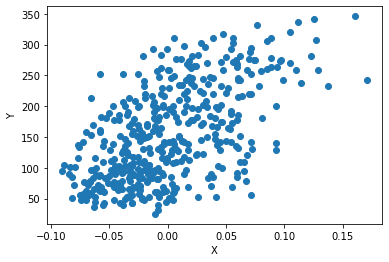

In [11]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 5. 경사 하강법

### 1) 가중치 초기화

In [16]:
# 가중치 초기화
W = 1.0
b = 1.0

# 입력 x와 예측값 y_hat
y_hat = W * x[0] + b 
print(y_hat)

1.0616962065186886


### 2) 예측값 구하기

In [17]:
print(y[0])

151.0


### 3) 가중치 업데이트

In [18]:
# y = W * x + b
w_inc = W + 0.01
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0623131685838754


In [20]:
w_rate = (y_hat_inc - y_hat) / (w_inc - W)
print(w_rate)

0.06169620651867985


In [21]:
w_new = W + w_rate

In [23]:
# b 업데이트(W와 비슷한 과정)
b_inc = b + 0.1
y_hat_inc = x[0] * W + b_inc
print(y_hat_inc)

1.1616962065186887


In [24]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [25]:
b_new = b + 1
print(b_new)

2.0


## 오차 역전파
y_hat과 y의 차이를 아용해서 W와 b를 업데이트하는 방식.(오차가 연이어 전파)

In [28]:
err = y[0] - y_hat
w_new = w_new + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

-14.344896345068978 150.05464981555136


## x[1]을 사용해 오차를 구하고, 새로운 W와 b을 구해볼게요!

In [29]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

-10.443520768373995 74.2616099270696


### 4) 모든 샘플과 에포크에 대해 반복


*   zip: 모아둔 것!



In [30]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * W + b # W * x / x * W
  err = y_i - y_hat
  w_rate = x_i
  W = W + w_rate * err
  b = b + 1 * err

print(W, b)

587.8654539985689 99.40935564531424


## 5) 결과 확인 그래프

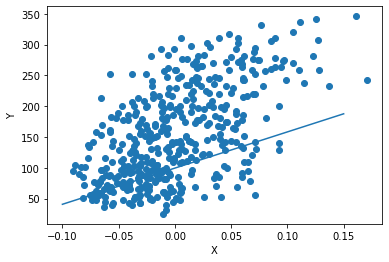

In [31]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * W + b)
pt2 = (0.15, 0.15 * W + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()